<a href="https://colab.research.google.com/github/jul-os/forclasses/blob/main/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
train= pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')

In [68]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [43]:
K[1]=[0, 1]

ValueError: ignored

In [50]:
train

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [57]:
test

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...
7173,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
7174,178 174 172 173 181 188 191 194 196 199 200 20...
7175,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
7176,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [71]:
K=np.array(list(train['pixels']))
X_train=[]
for i in range(len(K)):
   X_train.append(np.array(K[i].split(), dtype='float32'))
X_train=np.array(X_train)

K=np.array(list(train['emotion']))
Y_train=[]
for i in range(len(K)):
  Y_train.append(np.array(K[i], dtype='float32'))
Y_train=np.array(Y_train)  
K=np.array(list(test['pixels']))
X_test=[]
for i in range(len(K)):
   X_test.append(np.array(K[i].split(), dtype='float32'))
X_test=np.array(X_test)

In [77]:
X_train.shape, X_test.shape

((28709, 2304), (7178, 2304))

In [73]:
batch_size = 128
num_epochs = 20
hidden_size = 512

In [79]:
num_train = 28709
num_test = 7178

height, width, depth = 48, 48, 1
num_classes = 7
X_train = X_train.reshape(num_train, height * width)
X_test = X_test.reshape(num_test, height * width)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(Y_train, num_classes)

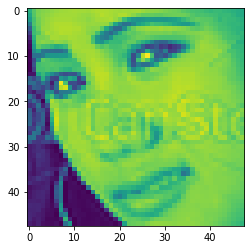

In [82]:
plt.imshow(X_test[1].reshape(48,48))

In [ ]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

In [ ]:
model.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Epoch 1/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0988 - val_accuracy: 0.9822
Epoch 2/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.1098 - val_accuracy: 0.9848
Epoch 3/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.1188 - val_accuracy: 0.9825
Epoch 4/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0951 - val_accuracy: 0.9847
Epoch 5/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.1205 - val_accuracy: 0.9825
Epoch 6/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.1181 - val_accuracy: 0.9837
Epoch 7/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.1253 - val_accuracy: 0.9835

[0.15625344216823578, 0.9782999753952026]